old shape of img (552, 552)
new shape of img (441, 441)
duration =  7
shape of audio_signal (308700,)
dt =  0.15873015873015872
shape of wave (7000,)
shape of audio_sigal slice (7000,)


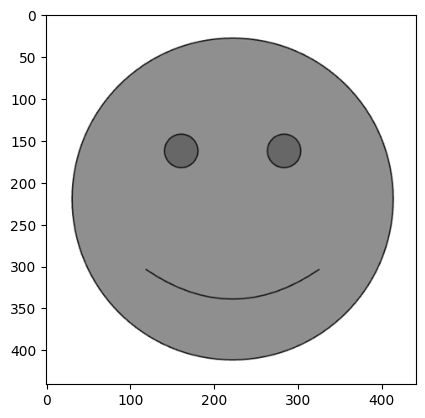

In [123]:
import numpy as np
from scipy.io.wavfile import write
# from scipy import 
from PIL import Image
import matplotlib.pyplot as plt

# Parameters
img_name = "2"
img_path = "audio_gen/" + img_name + '.png'  # Replace with your image path

# Read the image and convert to grayscale
new_shape = 441
img = Image.open(img_path).convert('L')

# convert to numpy array
np_img = np.array(img)
img_shape = np.shape(np_img)   
print("old shape of img", np.shape(np_img))    # print shape of numpy array

img = img.resize((int(new_shape*img_shape[1]/img_shape[0]), new_shape))   # resize to hight=441
np_img = np.array(img)
img_shape = np.shape(np_img)   
print("new shape of img", np.shape(np_img))    # print shape of numpy array

# plot img
plt.figure("1")
plt.imshow(img, cmap='gray')

sampling_rate = 44100  # Standard sampling rate for audio
duration = 2+int(5*(img_shape[1]/img_shape[0]))  # Duration of the audio in seconds
print("duration = ", duration)

# Initialize the audio signal
audio_signal = np.zeros(sampling_rate * duration)
print("shape of audio_signal", np.shape(audio_signal))

resolution = 10 # 20x20 pixels for each frequency sample in audio

# each frequency is a sin wave and should last for 0.1s
# so each frequency should have 441 samples
dt = duration/(img_shape[1]/resolution) # for each resolution frequency, duration is duration/(new_shape/resolution)
num_samples = int(sampling_rate*dt)
t = np.linspace(0, dt, num_samples)
print("dt = ", dt)

frequency = (1*resolution + resolution/2) * (4000/new_shape)  # Example frequency mapping
amplitude = 255 - np.min(np_img[0*resolution:(0+1)*resolution, 1*resolution:(1+1)*resolution])
wave = amplitude * np.sin(2 * np.pi * frequency * t)
print("shape of wave" , np.shape(t))
print("shape of audio_sigal slice", np.shape(audio_signal[0*num_samples : (0+1)*num_samples]))

# Generate audio signal from np_img
# plt.figure("2")
# total of 5s, for 441 pixels, each 20 pixel takes 5s/441*20 \approx 0.22s
for x in range(0, int(np.floor(img_shape[1]/resolution)), 1):
    # for each 20 pixels, find the max frequency
    # print("x = ", x)
    for y in range(int(np.floor(img_shape[0]/resolution)), 0, -1):
        # map (0, np.shape(np_img)[0] / resolution) -> (10, 4kHz)
        frequency = ((int(np.floor(img_shape[0]/resolution))-y)*resolution + resolution/2) * (4410/new_shape-1)  # Example frequency mapping

        # find the minimum amplitude (black) in the range
        amplitude = np.min(np_img[y*resolution:(y+1)*resolution, x*resolution:(x+1)*resolution])

        # revert the color of the pixel (black is high amplitude, white is low amplitude)
        amplitude = 255-amplitude

        # Generate wave based on frequency and amplitude
        # print("x=", x, "y=", y, "frequency=", frequency, "amplitude=", amplitude)
        wave = amplitude * np.sin(2 * np.pi * frequency * t)
        audio_signal[x*num_samples : (x+1)*num_samples] += wave

        # plt.plot(t, wave)

        # break
    # break

# Normalize to 16-bit range
audio_signal /= np.max(np.abs(audio_signal))
audio_signal = (audio_signal * 32767).astype(np.int16)

# Save as WAV file
write("audio_gen/"+img_name+'.wav', sampling_rate, audio_signal)


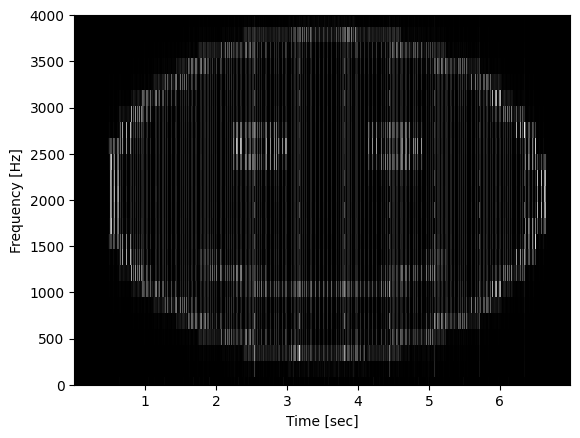

In [124]:
# load output.wav and generate the spectrogram
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

# read wav file
fs, data = wavfile.read("audio_gen/"+img_name+'.wav')

# generate spectrogram on grayscale
plt.figure("3")
f, t, Sxx = signal.spectrogram(data, fs)
plt.pcolormesh(t, f, Sxx, cmap='gray')
plt.ylim(0, 4000)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
